<a href="https://colab.research.google.com/github/carlycrowther8/carlycrowther8/blob/main/BioLay_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages and set-up

In [4]:
!pip install datasets nltk textstat matplotlib seaborn readability-lxml spacy scikit-learn tqdm

import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import textstat
import spacy
from tqdm import tqdm
from datasets import load_dataset
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

  Using cached datasets-3.5.0-py3-none-any.whl.metadata (19 kB)
  Using cached textstat-0.7.5-py3-none-any.whl.metadata (15 kB)
  Using cached readability_lxml-0.8.1-py3-none-any.whl.metadata (3.6 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.5.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py311-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached pyphen-0.17.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached cmudict-1.0.32-py3-none-any.whl.metadata (3.6 kB)
  Using cached cssselect-1.3.0-py3-none-any.whl.metadata (2.6 kB)
Using cached datasets-3.5.0-py3-none-any.whl (491 kB)
Using cached textstat-0.7.5-py3-none-any.whl (105 kB)
Using cached readability_lxml-0.8.1-py3-none-any.whl (20 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached fsspec-2024.12.0-py3-none-any.whl (183 kB)
Using cached multiprocess-

True

In [5]:
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/usr/local/lib/python3.11/dist-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/usr/local/lib/python3.11/dist-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.11/dist-packages/spacy/compat.py", line 4, in <module>
    from thinc.util import copy_array
  File "/usr/local/lib/python3.11/dist-packages/thinc/__init__.py", line 5, in <module>
    from .config import registry
  File "/usr/local/lib/python3.11/dist-packages/thinc/config.py", line 2, in <module>
    import confection
  File "/usr/local/lib/python3.11/dist-packages/confection/__init__.py", line 35, in <module>
    import srsly
  File "/usr/local/lib/python3.11/dist-packages/srsly/__init__.py", line 5

In [6]:
plos = load_dataset("BioLaySumm/BioLaySumm2025-PLOS")
elife = load_dataset("BioLaySumm/BioLaySumm2025-eLife")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/693 [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/169M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/170M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/169M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/28.2M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/3.19M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/24773 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1376 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/142 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/689 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/126M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/6.92M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/3.27M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4346 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/241 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/142 [00:00<?, ? examples/s]

In [8]:
# Convert to Pandas DataFrames
def dataset_to_df(ds_dict):
    return {split: ds_dict[split].to_pandas() for split in ds_dict}

plos_df = dataset_to_df(plos)
elife_df = dataset_to_df(elife)

Summary of datasets

In [9]:
# summary
print("PLOS Dataset Sizes:", {k: len(v) for k, v in plos_df.items()})
print("eLife Dataset Sizes:", {k: len(v) for k, v in elife_df.items()})
print("Columns Available:", plos_df['train'].columns.tolist())

PLOS Dataset Sizes: {'train': 24773, 'validation': 1376, 'test': 142}
eLife Dataset Sizes: {'train': 4346, 'validation': 241, 'test': 142}
Columns Available: ['article', 'summary', 'section_headings', 'keywords', 'year', 'title']


## Run these cells for toy version of datasets

In [ ]:
plos_train_small = plos_df['train'].head(50).copy()
plos_val_small = plos_df['validation'].head(50).copy()
plos_test_small = plos_df['test'].head(50).copy()

# Combine into a dictionary similar to the original structure
plos_df_small = {
    'train': plos_train_small,
    'validation': plos_val_small,
    'test': plos_test_small
}

# Take 50 rows from each split and copy to avoid SettingWithCopyWarnings
elife_train_small = elife_df['train'].head(50).copy()
elife_val_small = elife_df['validation'].head(50).copy()
elife_test_small = elife_df['test'].head(50).copy()

# Combine into a dictionary like the original structure
elife_df_small = {
    'train': elife_train_small,
    'validation': elife_val_small,
    'test': elife_test_small
}

In [ ]:
print("PLOS SMALL Dataset Sizes:", {k: len(v) for k, v in plos_df_small.items()})
print("eLife SMALL Dataset Sizes:", {k: len(v) for k, v in elife_df_small.items()})
print("Columns Available:", plos_df_small['train'].columns.tolist())

In [ ]:
# def compute_length_features(df, text_col):
#     df[f"num_tokens_{text_col}"] = df[text_col].apply(lambda text: len(word_tokenize(text)))
#     df[f"num_sentences_{text_col}"] = df[text_col].apply(lambda text: len(sent_tokenize(text)))
#     return df

# # Apply only to train splits # SMALL
# plos_df_small['train'] = compute_length_features(plos_df_small['train'], "article")
# plos_df_small['train'] = compute_length_features(plos_df_small['train'], "summary")

# elife_df_small['train'] = compute_length_features(elife_df_small['train'], "article")
# elife_df_small['train'] = compute_length_features(elife_df_small['train'], "summary")



##Computing and visualizing length features for articles and summaries

In [11]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
def compute_length_features(df, text_col):
    df[f"num_tokens_{text_col}"] = df[text_col].apply(lambda text: len(word_tokenize(text)))
    df[f"num_sentences_{text_col}"] = df[text_col].apply(lambda text: len(sent_tokenize(text)))
    return df

# Apply only to train splits
plos_df['train'] = compute_length_features(plos_df['train'], "article")
plos_df['train'] = compute_length_features(plos_df['train'], "summary")

elife_df['train'] = compute_length_features(elife_df['train'], "article")
elife_df['train'] = compute_length_features(elife_df['train'], "summary")

In [18]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

save_folder = "/content/drive/MyDrive/plot_exports"


Mounted at /content/drive


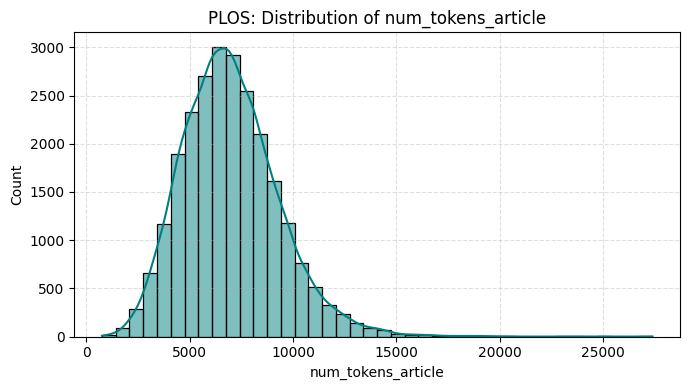

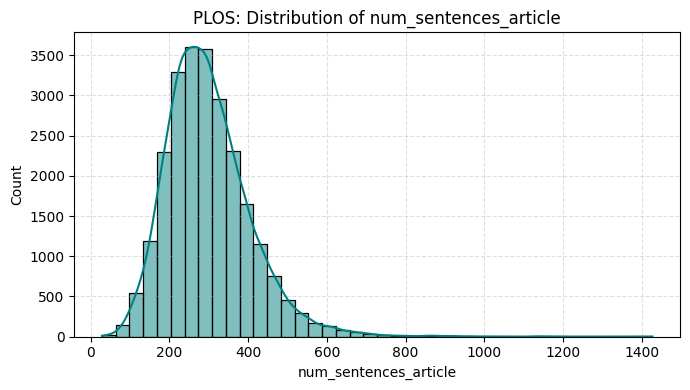

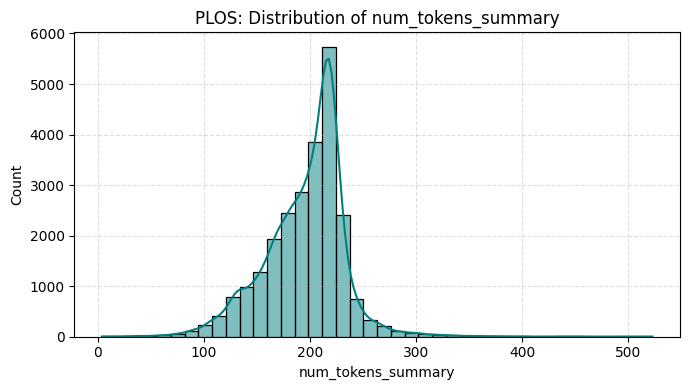

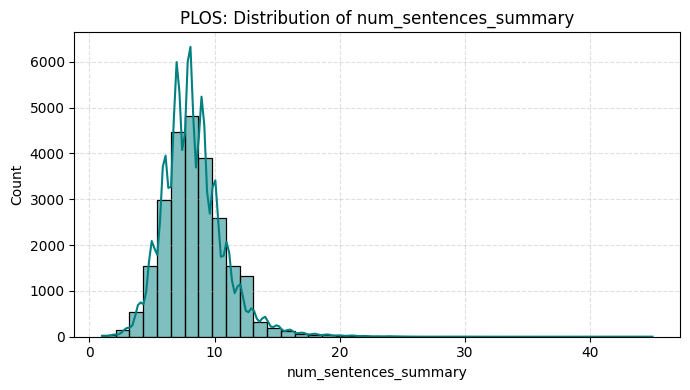

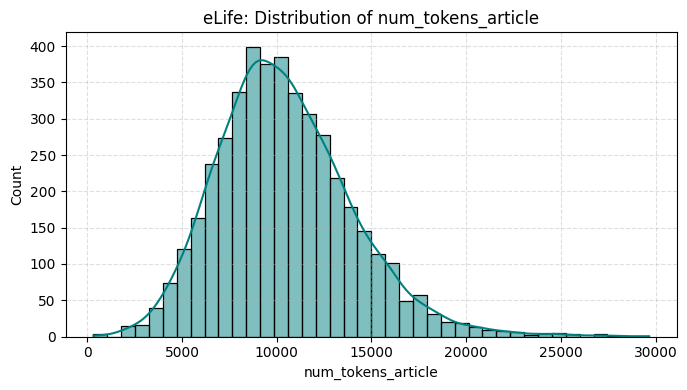

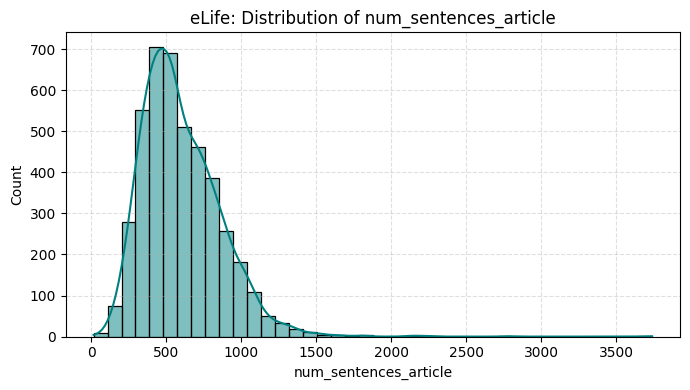

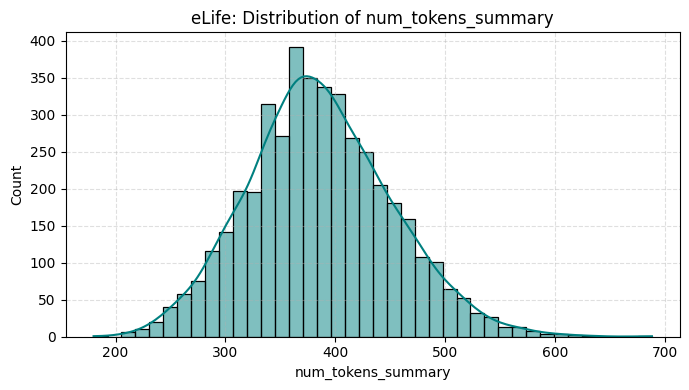

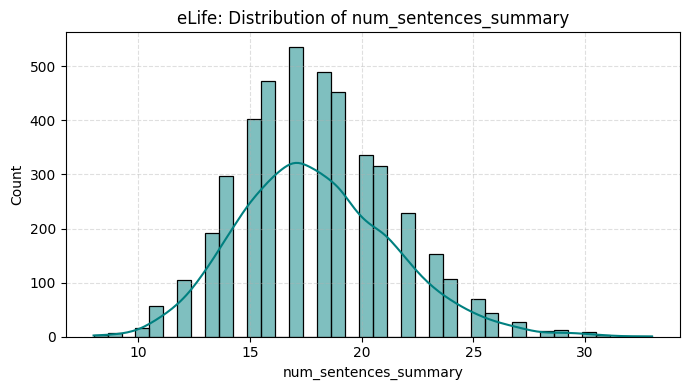

In [19]:

def plot_length_distributions(dataset, source_name, save_dir=None):
    features = [
        "num_tokens_article", "num_sentences_article",
        "num_tokens_summary", "num_sentences_summary",
    ]

    if save_dir and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for feat in features:
        plt.figure(figsize=(7, 4))
        sns.histplot(dataset[feat], bins=40, kde=True, color='teal')
        plt.title(f"{source_name}: Distribution of {feat}")
        plt.xlabel(feat)
        plt.ylabel("Count")
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.tight_layout()
        if save_dir:
            filename = f"{source_name}_{feat}.png"
            filepath = os.path.join(save_dir, filename)
            plt.savefig(filepath, dpi=300)

        plt.show()

plot_length_distributions(plos_df['train'], "PLOS", save_dir=save_folder)
plot_length_distributions(elife_df['train'], "eLife", save_dir=save_folder)


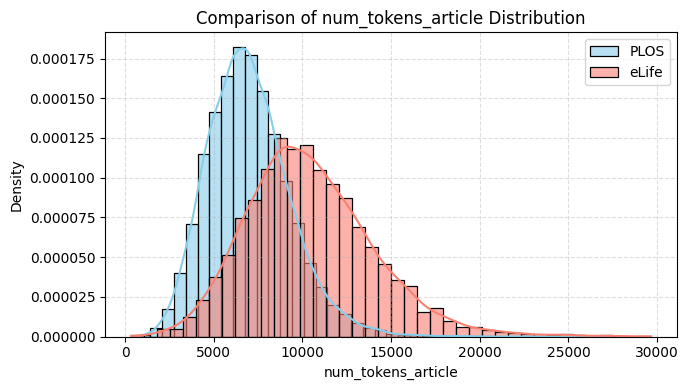

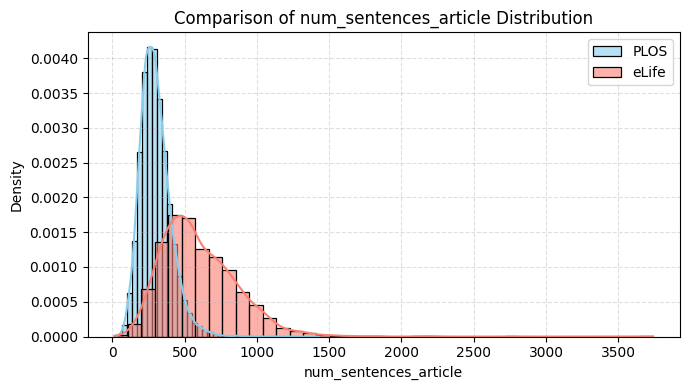

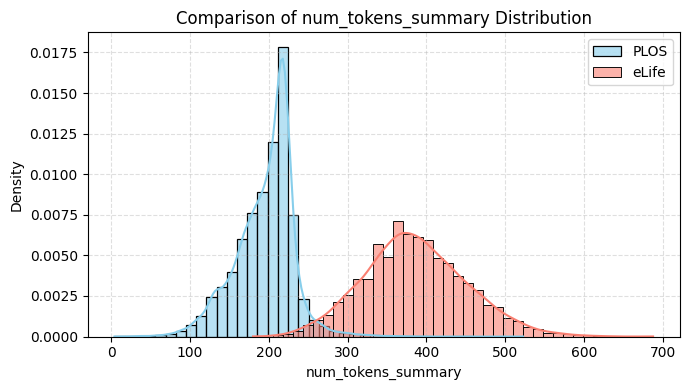

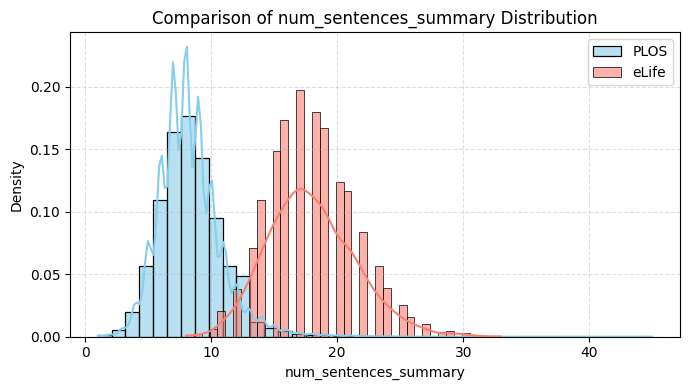

In [21]:
# comaparing 2 datasets
def compare_length_distributions(plos_df, elife_df, save_dir=None):
    import matplotlib.pyplot as plt
    import seaborn as sns

    features = [
        "num_tokens_article", "num_sentences_article",
        "num_tokens_summary", "num_sentences_summary"
    ]

    for feat in features:
        plt.figure(figsize=(7, 4))
        sns.histplot(plos_df[feat], bins=40, kde=True, stat="density", color="skyblue", label="PLOS", alpha=0.6)
        sns.histplot(elife_df[feat], bins=40, kde=True, stat="density", color="salmon", label="eLife", alpha=0.6)

        plt.title(f"Comparison of {feat} Distribution")
        plt.xlabel(feat)
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.tight_layout()
        if save_dir:
            filename = f"{source_name}_{feat}.png"
            filepath = os.path.join(save_dir, filename)
            plt.savefig(filepath, dpi=300)
        plt.show()

compare_length_distributions(plos_df['train'], elife_df['train'], save_dir=save_folder)

In [22]:
# Saving length information to Drive to avoid re-running on full dataset again

# Save to Drive
plos_df['train'].to_pickle('/content/drive/MyDrive/plos_train_updated.pkl')
elife_df['train'].to_pickle('/content/drive/MyDrive/elife_train_updated.pkl')


# # How to re-load
# from google.colab import drive
# drive.mount('/content/drive')

# import pandas as pd
# plos_df = {}
# elife_df = {}

# plos_df['train'] = pd.read_pickle('/content/drive/MyDrive/plos_train_updated.pkl')
# elife_df['train'] = pd.read_pickle('/content/drive/MyDrive/elife_train_updated.pkl')

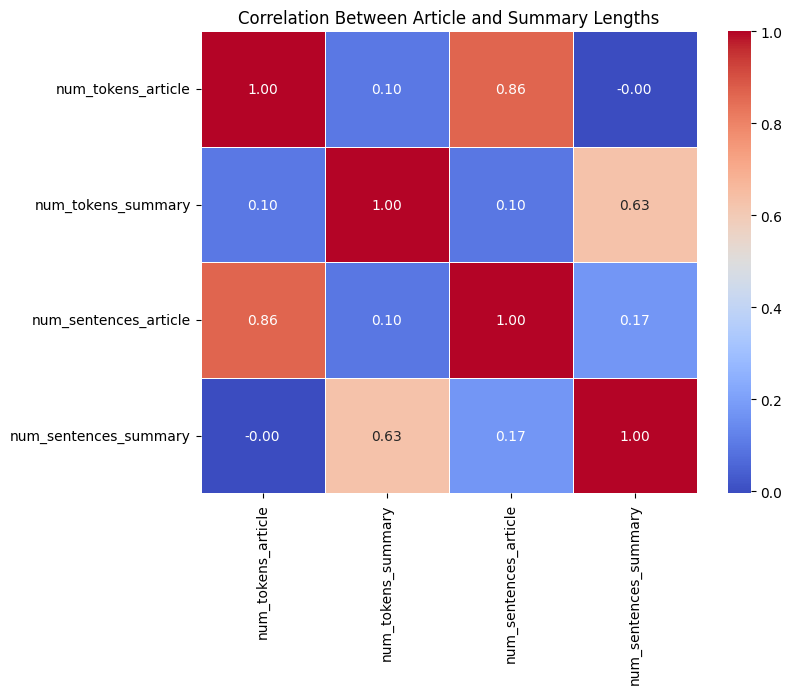

In [23]:
length_columns = ['num_tokens_article', 'num_tokens_summary', 'num_sentences_article', 'num_sentences_summary']
correlation_matrix = plos_df['train'][length_columns].corr()  # Use 'train' split, or whatever split you want

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Article and Summary Lengths")
plt.savefig(f"{save_folder}/art_sum_heatmap.png", dpi=300)
plt.show()

<ipython-input-24-0eff907ca0e0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dataset', y='compression_ratio', data=mean_compression, palette='Set2')


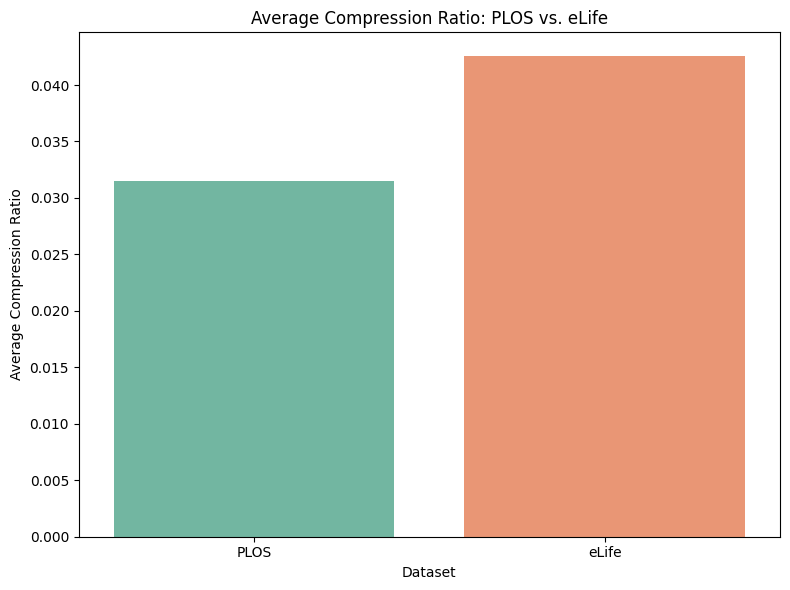

<ipython-input-24-0eff907ca0e0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dataset', y='compression_ratio', data=combined_df, palette='Set2')


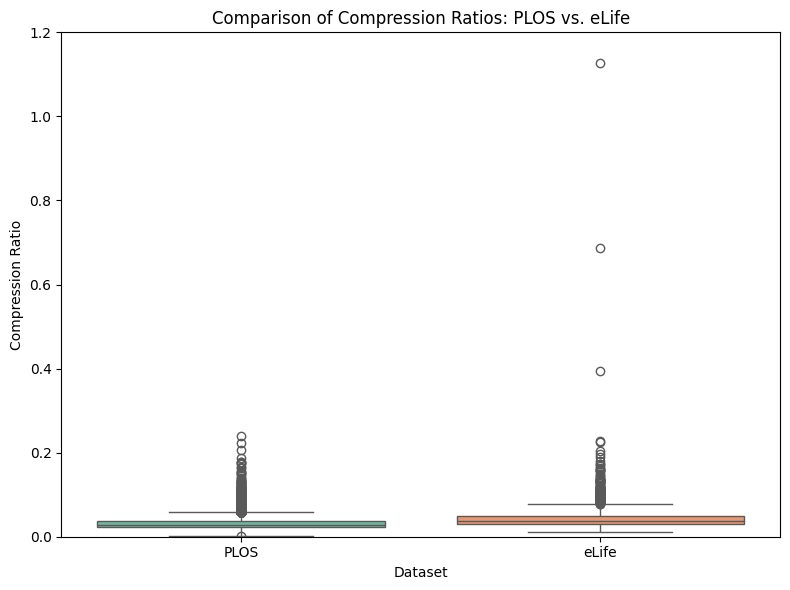

In [24]:
plos_df['train']['compression_ratio'] = plos_df['train']['num_tokens_summary'] / plos_df['train']['num_tokens_article']
elife_df['train']['compression_ratio'] = elife_df['train']['num_tokens_summary'] / elife_df['train']['num_tokens_article']

plos_df['train']['dataset'] = 'PLOS'
elife_df['train']['dataset'] = 'eLife'

combined_df = pd.concat([plos_df['train'][['compression_ratio', 'dataset']], elife_df['train'][['compression_ratio', 'dataset']]])

mean_compression = combined_df.groupby('dataset')['compression_ratio'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='dataset', y='compression_ratio', data=mean_compression, palette='Set2')
plt.title("Average Compression Ratio: PLOS vs. eLife")
plt.xlabel("Dataset")
plt.ylabel("Average Compression Ratio")
plt.tight_layout()
plt.savefig(f"{save_folder}/avg_compression_ratio_bar.png", dpi=300)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='dataset', y='compression_ratio', data=combined_df, palette='Set2')
plt.title("Comparison of Compression Ratios: PLOS vs. eLife")
plt.xlabel("Dataset")
plt.ylabel("Compression Ratio")
# Adjust the y-axis
plt.ylim(0,1.2)
plt.tight_layout()
plt.savefig(f"{save_folder}/avg_compression_ratio_box.png", dpi=300)
plt.show()

##Calculating and visualizing readability scores for articles and summaries

In [ ]:
def compute_readability(df, colname):
    # Ensure the column exists before applying
    if colname in df.columns:
        df[f"{colname}_flesch_kincaid"] = df[colname].apply(textstat.flesch_kincaid_grade)
        df[f"{colname}_smog"] = df[colname].apply(textstat.smog_index)
        df[f"{colname}_coleman_liau"] = df[colname].apply(textstat.coleman_liau_index)
    else:
        print(f"Column '{colname}' not found in the DataFrame.")
    return df


plos_df_1 = compute_readability(plos_df['train'], "article")
plos_df_1 = compute_readability(plos_df['train'], "summary")

elife_df_1 = compute_readability(elife_df['train'], "article")
elife_df_1 = compute_readability(elife_df['train'], "summary")

In [ ]:
def plot_readability_comparison(df, label, metric, save_dir=None):
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df[f"article_{metric}"], label="Articles", fill=True)
    sns.kdeplot(df[f"summary_{metric}"], label="Summaries", fill=True)
    plt.title(f"{metric.upper()} Readability - {label}")
    plt.xlabel("Score")
    plt.legend()
    plt.grid(True)
    plt.show()

for metric in ["flesch_kincaid", "smog", "coleman_liau"]:
    plot_readability_comparison(plos_df_1, "PLOS", metric, save_dir=save_folder)
    plot_readability_comparison(elife_df_1, "eLife", metric, save_dir=save_folder)


In [ ]:

def plot_readability_comparison(df_plos, df_elife, metric):
    plt.figure(figsize=(10, 6))

    # Plot for PLOS
    sns.kdeplot(df_plos[f"article_{metric}"], label=f"PLOS Articles - {metric}", fill=True, alpha=0.5)
    sns.kdeplot(df_plos[f"summary_{metric}"], label=f"PLOS Summaries - {metric}", fill=True, alpha=0.5)

    # Plot for eLife
    sns.kdeplot(df_elife[f"article_{metric}"], label=f"eLife Articles - {metric}", fill=True, alpha=0.5)
    sns.kdeplot(df_elife[f"summary_{metric}"], label=f"eLife Summaries - {metric}", fill=True, alpha=0.5)

    plt.title(f"{metric.upper()} Readability Comparison")
    plt.xlabel("Readability Score")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# List of readability metrics to compare
metrics = ["flesch_kincaid", "smog", "coleman_liau"]

# Plot for each metric
for metric in metrics:
    plot_readability_comparison(plos_df_1, plos_df_1, metric)


## Other features

In [ ]:
def vocab_overlap(df):
    overlaps = []

    for art_tokens, summ_tokens in zip(df['num_tokens_article'], df['num_tokens_summary']):
        art_set = set(art_tokens)
        summ_set = set(summ_tokens)

        if len(summ_set) > 0:
            overlap = len(art_set & summ_set) / len(summ_set)
            overlaps.append(overlap)

    plt.figure(figsize=(8, 4))
    sns.histplot(overlaps, bins=20, kde=True)
    plt.title("Vocabulary Overlap (% shared words in summaries)")
    plt.xlabel("Overlap Ratio")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

    print(f"Mean Overlap: {sum(overlaps)/len(overlaps):.2f}")

vocab_overlap(plos_df['train'])
vocab_overlap(elife_df['train'])

In [ ]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Download necessary NLTK resources
nltk.download('punkt', quiet=True)
from nltk.corpus import stopwords



In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

    return " ".join(tokens)

# Apply preprocessing to article and summary texts (for both PLOS and eLife)
plos_train['article_cleaned'] = plos_train['article'].apply(preprocess_text)
plos_train['summary_cleaned'] = plos_train['summary'].apply(preprocess_text)

elife_train['article_cleaned'] = elife_train['article'].apply(preprocess_text)
elife_train['summary_cleaned'] = elife_train['summary'].apply(preprocess_text)

# Combine both article and summary text for domain-specific word cloud
text_data_plos = " ".join(plos_train['article_cleaned'].tolist() + plos_train['summary_cleaned'].tolist())
text_data_elife = " ".join(elife_train['article_cleaned'].tolist() + elife_train['summary_cleaned'].tolist())

# Generate word cloud
wordcloud_plos = WordCloud(width=800, height=400, background_color="white", max_words=200).generate(text_data_plos)
wordcloud_elife = WordCloud(width=800, height=400, background_color="white", max_words=200).generate(text_data_elife)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_plos, interpolation="bilinear")
plt.title("PLOS Domain-Specific Terminology")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_elife, interpolation="bilinear")
plt.title("eLife Domain-Specific Terminology")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
type(plos_df['train'])

